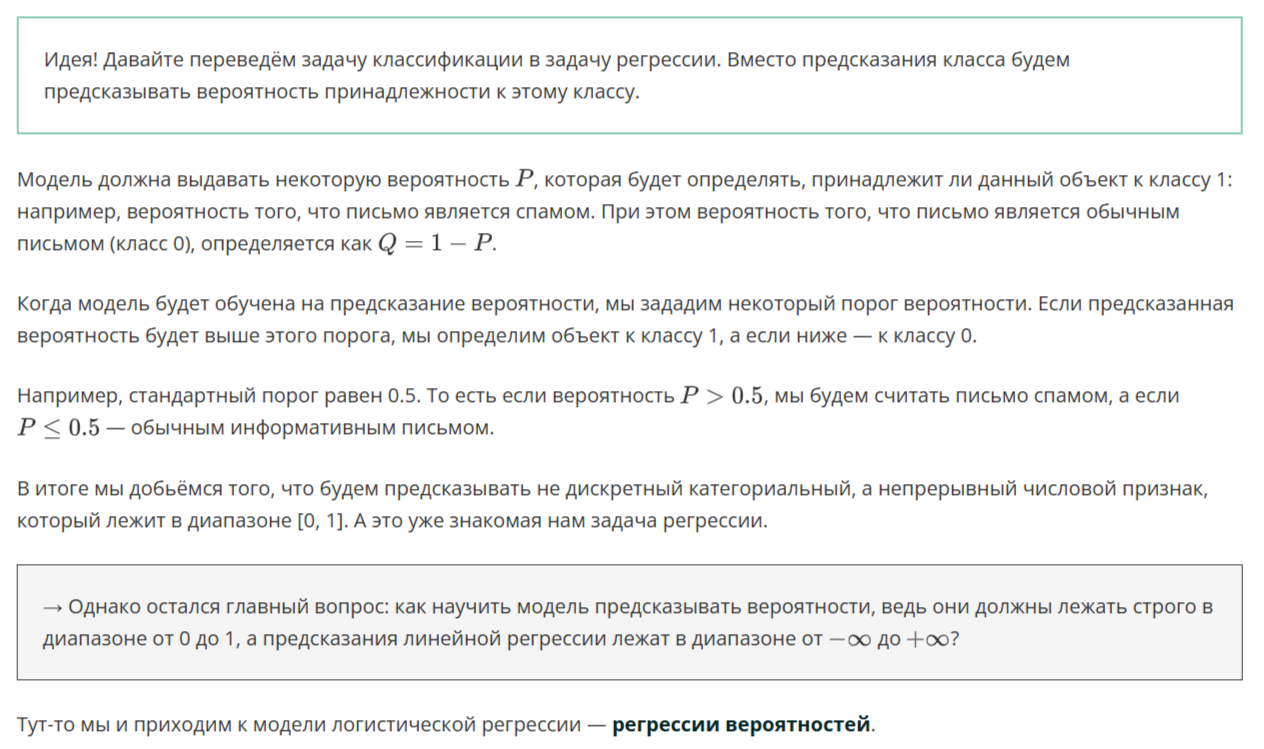

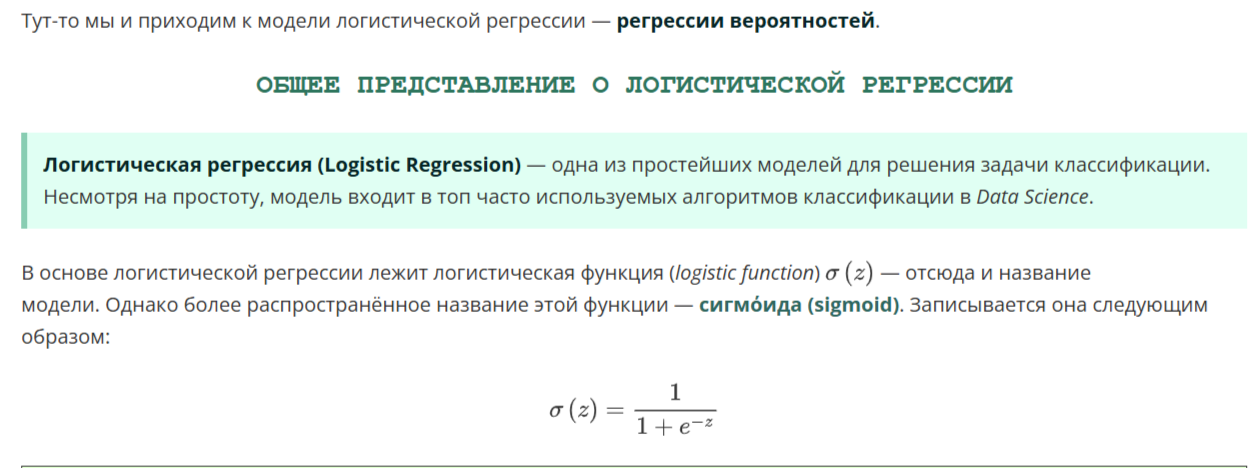

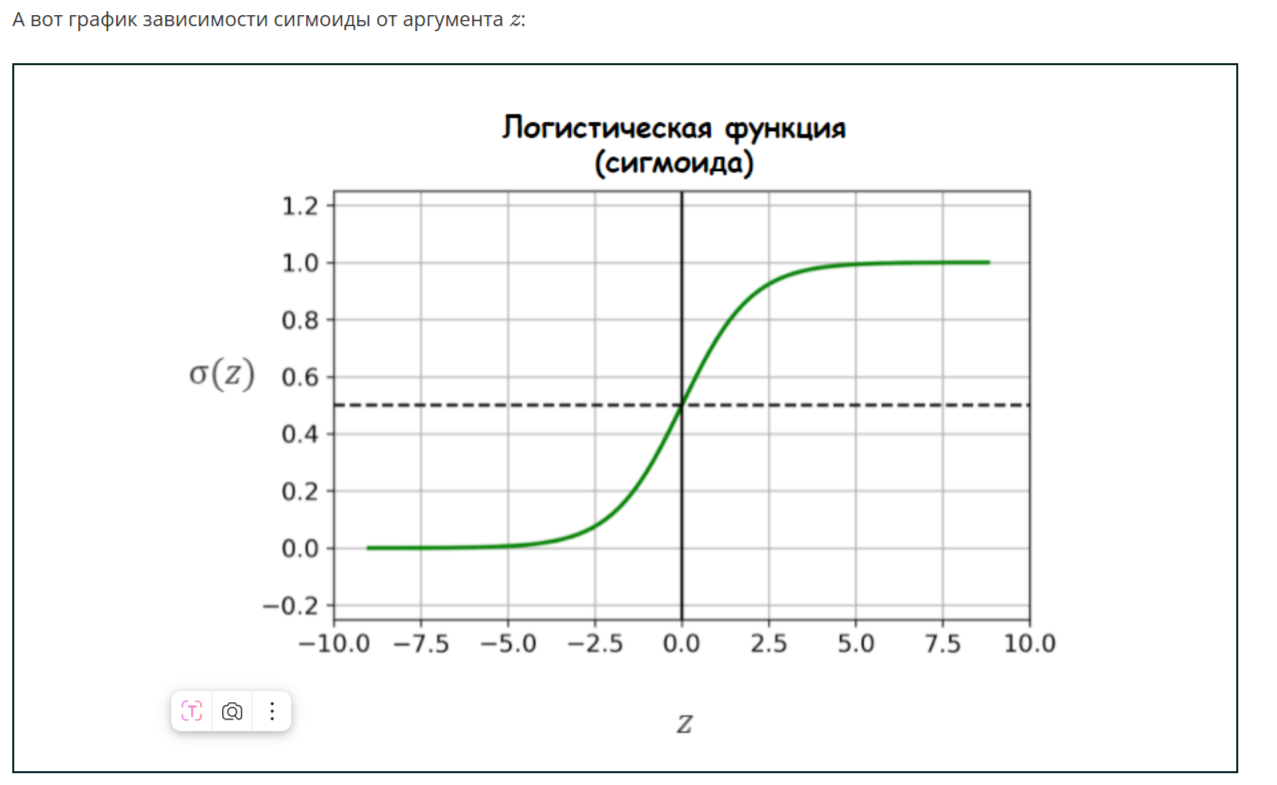

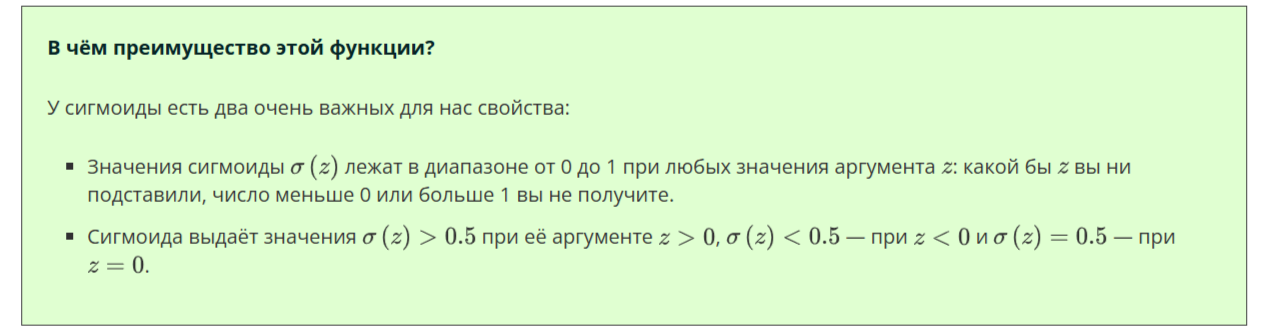

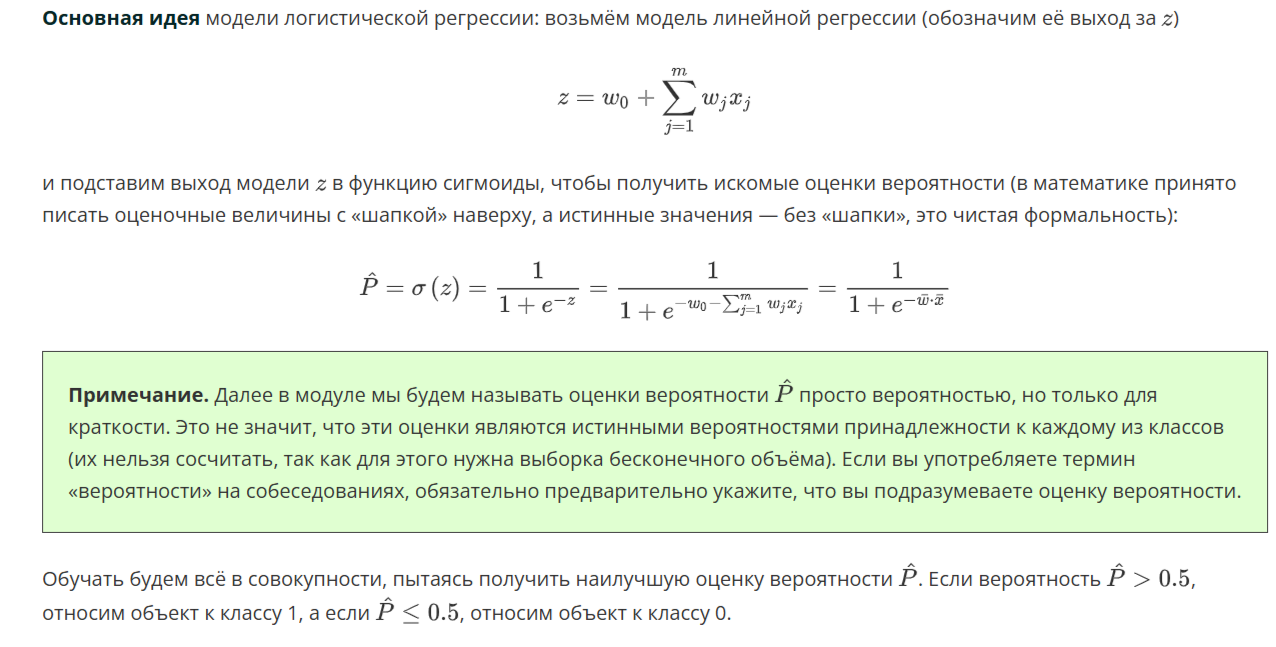

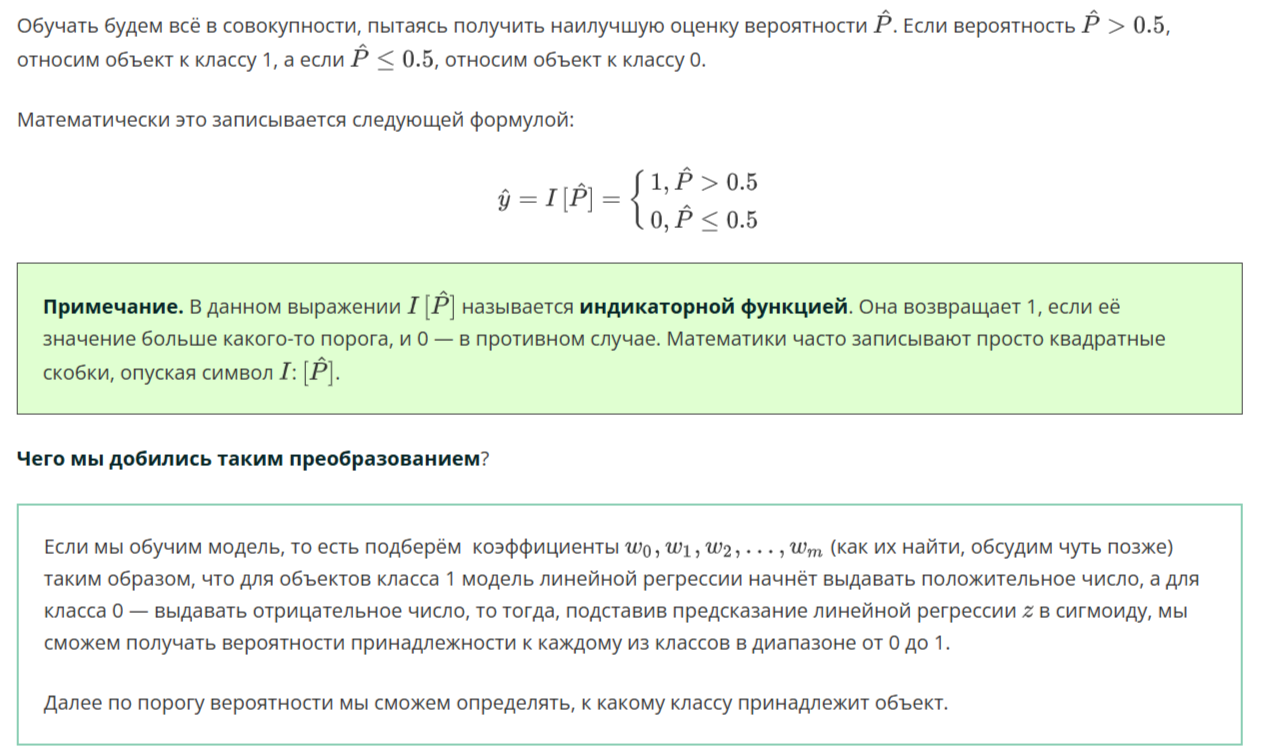

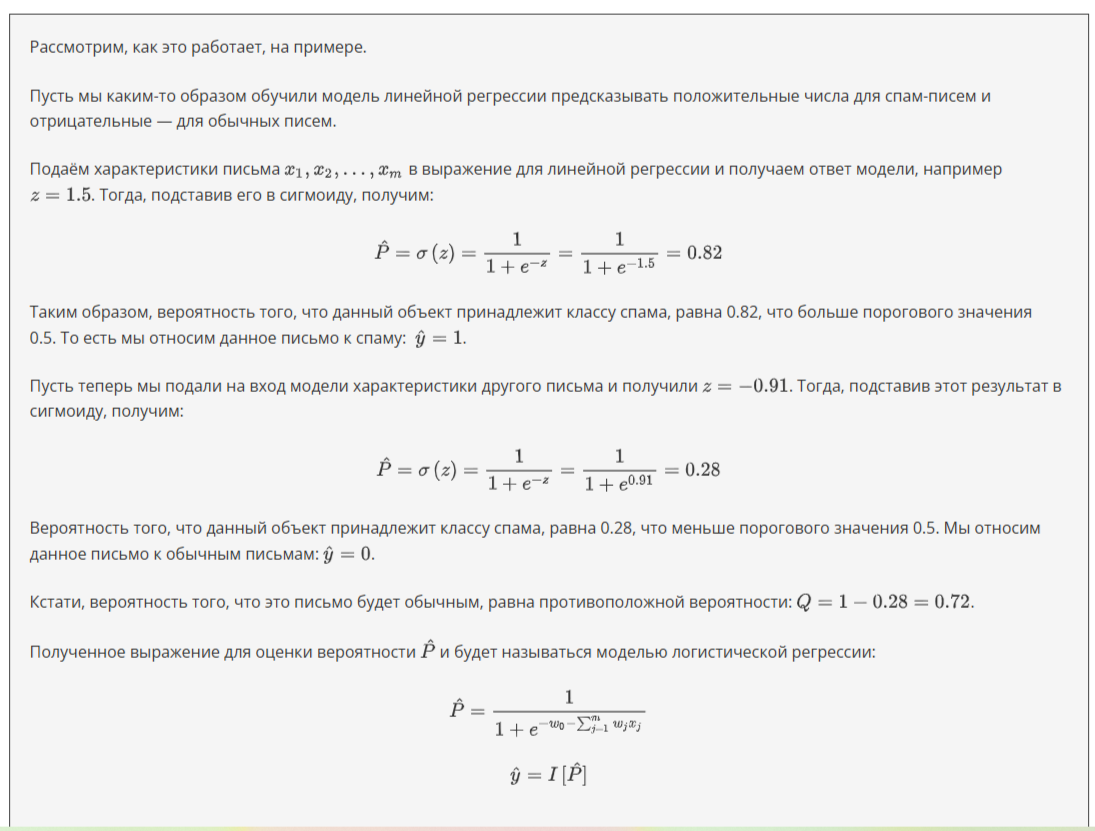

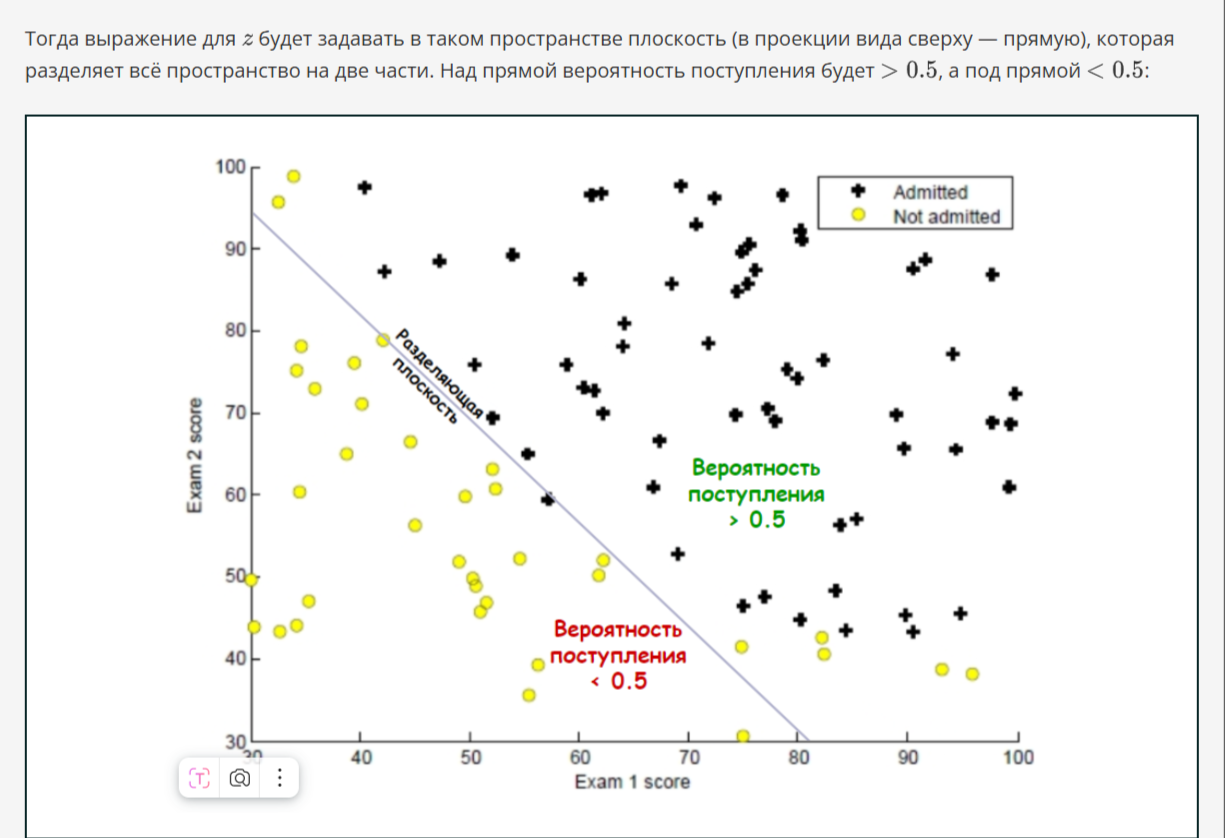

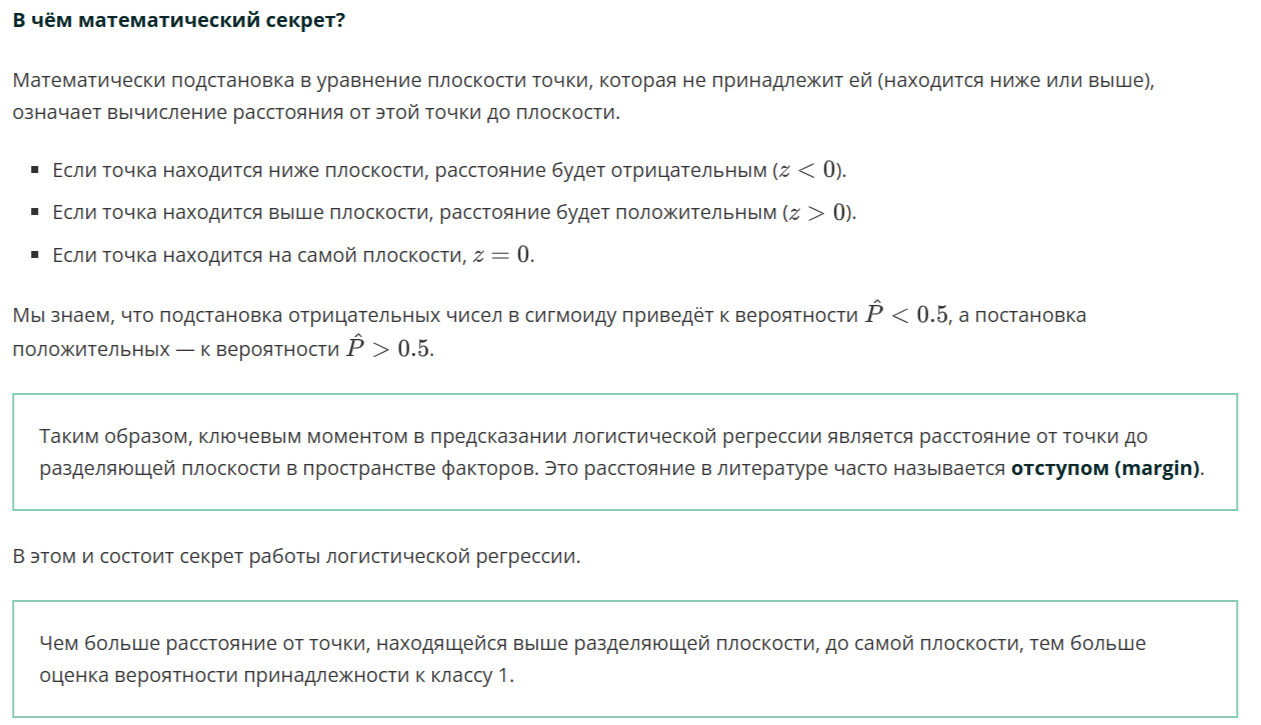

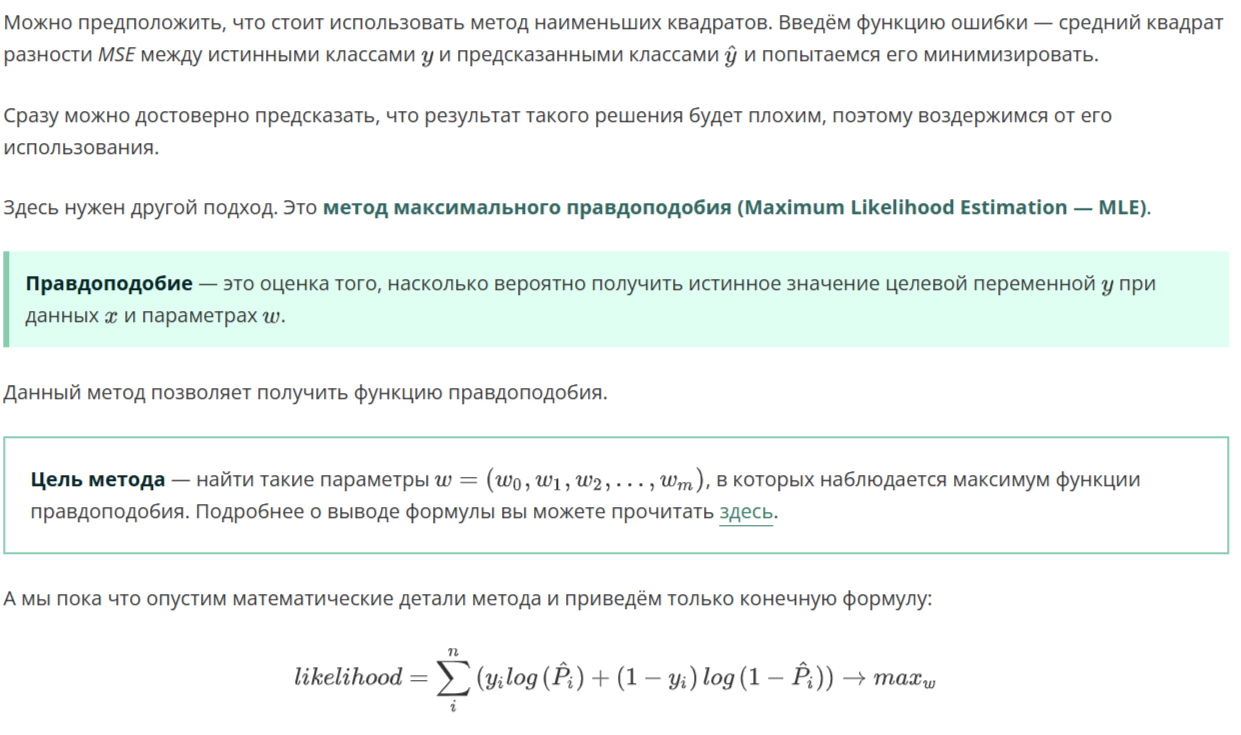

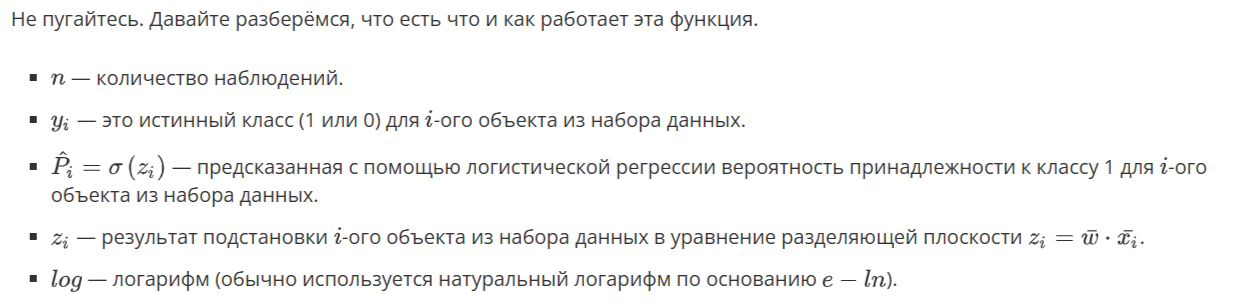

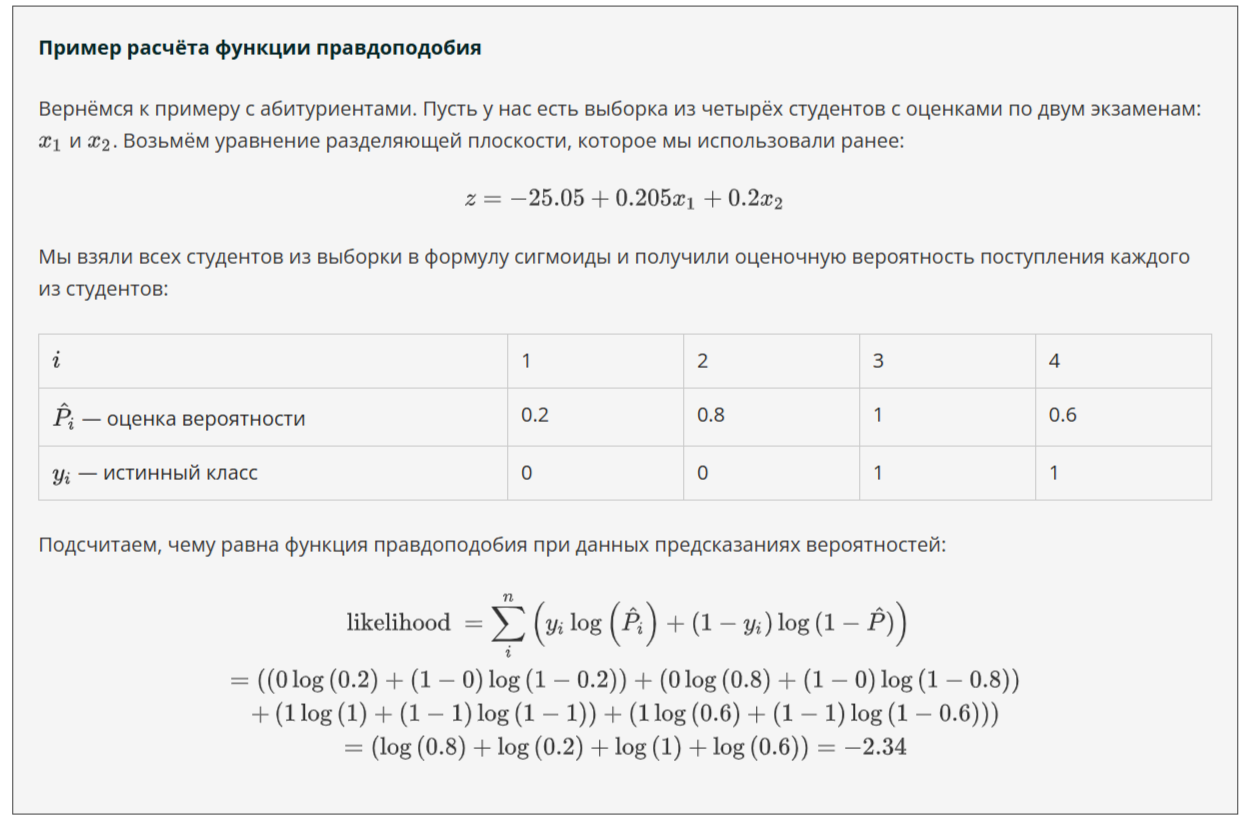

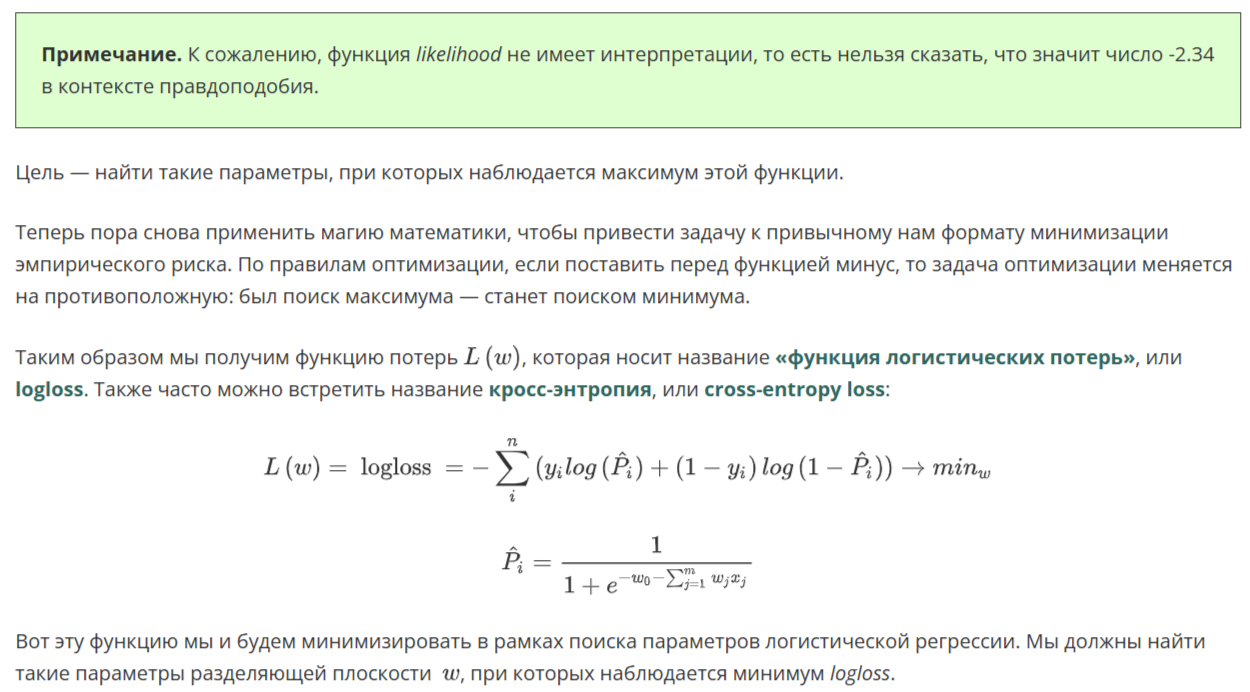

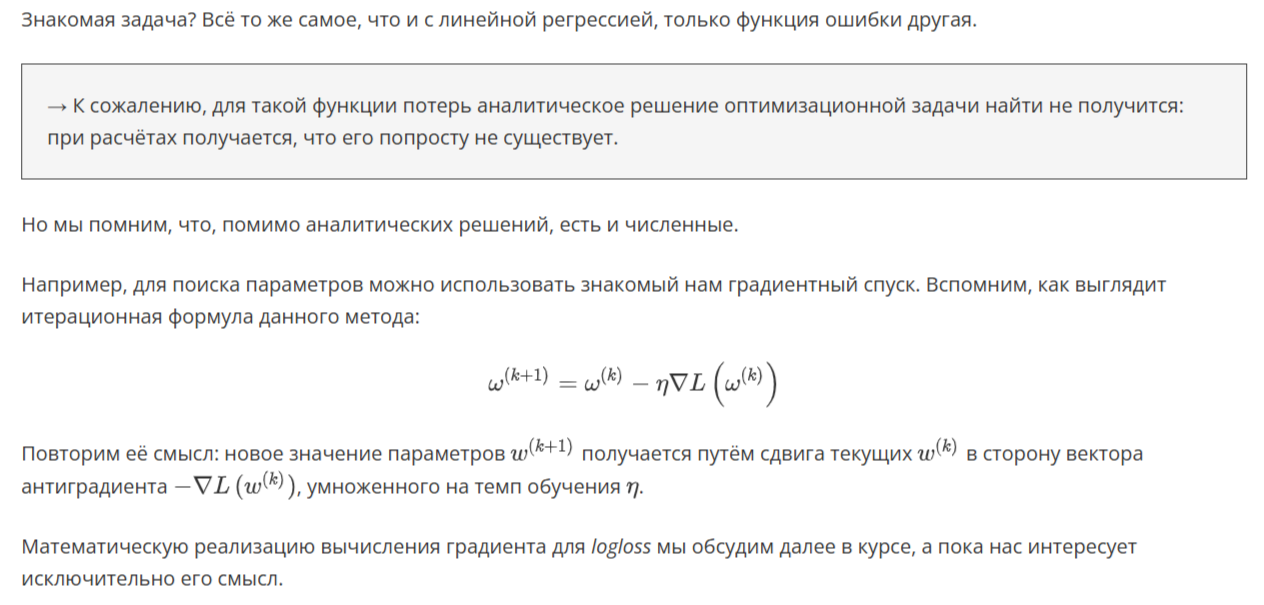

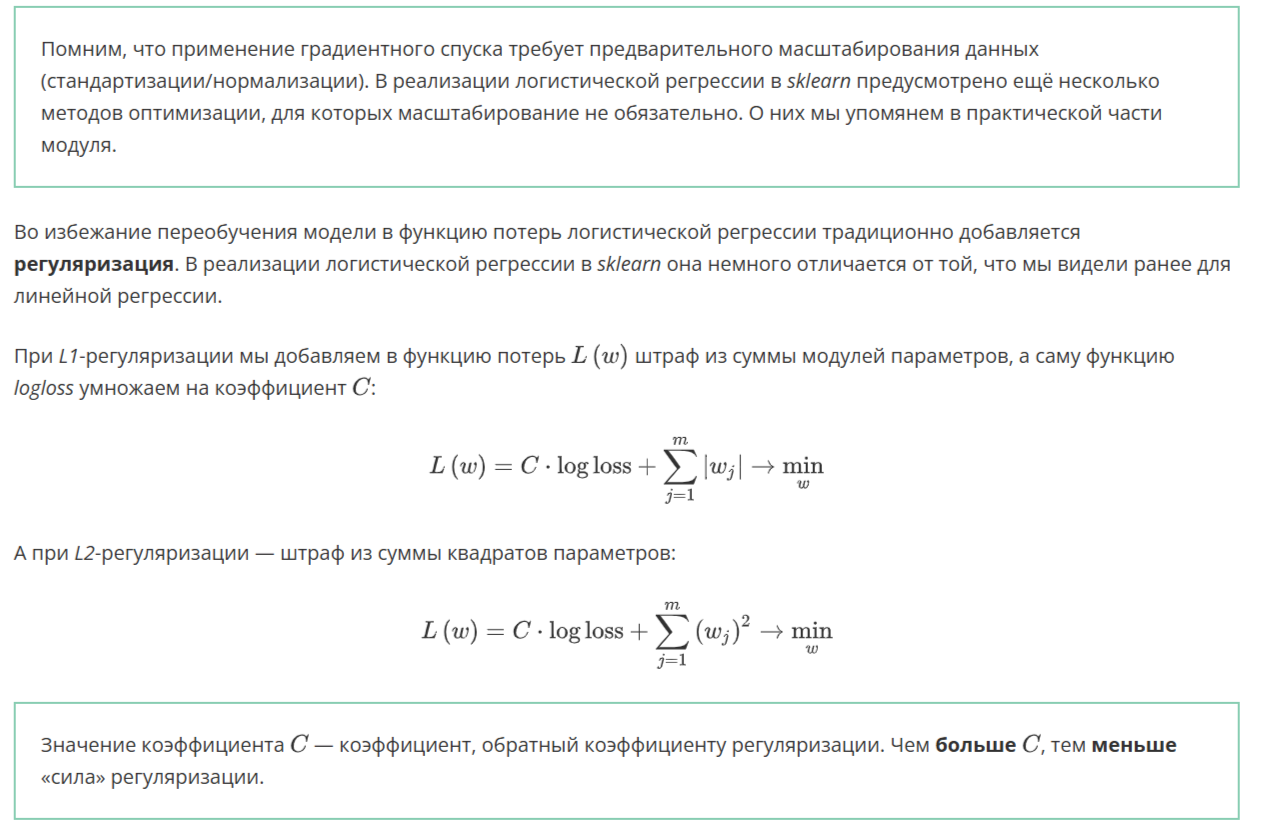

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\task_data.csv')
df

SNo       X_1       X_2    y
0     0 -0.869144  0.389310  0.0
1     1 -0.993467 -0.610591  0.0
2     2 -0.834064  0.239236  0.0
3     3 -0.136471  0.632003  1.0
4     4  0.403887  0.310784  1.0
..  ...       ...       ...  ...
95   95  0.531635 -0.479185  1.0
96   96 -0.650192  0.655303  1.0
97   97  0.985299  0.118333  1.0
98   98 -0.275289  0.005730  1.0
99   99  0.281860  0.726376  1.0

[100 rows x 4 columns]

In [6]:
X = df[['X_1', 'X_2']]
y = df['y']

In [7]:
from sklearn import linear_model
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [0.55528115]
w1, w2: [[2.81003262 2.5877695 ]]


In [8]:
from sklearn import linear_model
X = df[['X_1', 'X_2']]
y = df['y']
log_reg_2d = linear_model.LogisticRegression(random_state=42, solver='sag')
log_reg_2d.fit(X, y)


LogisticRegression(random_state=42, solver='sag')

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции - два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказывает вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линия, где вероятность равна 0.5.
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика

    plt.show()

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


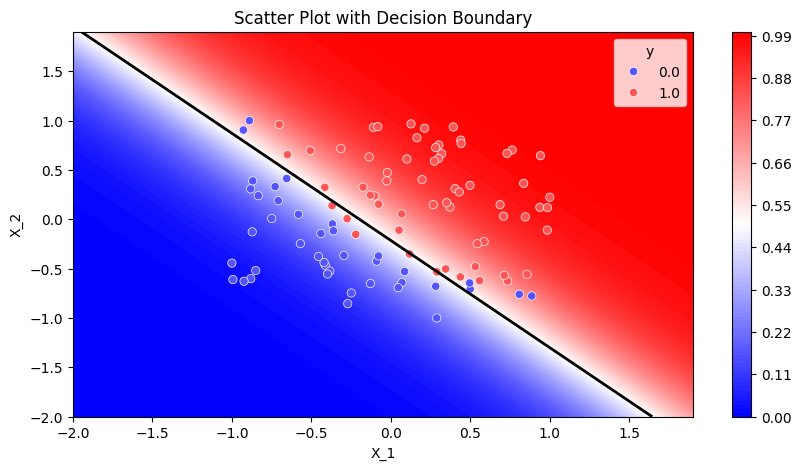

In [10]:
plot_probabilities_2d(X, y, log_reg_2d)

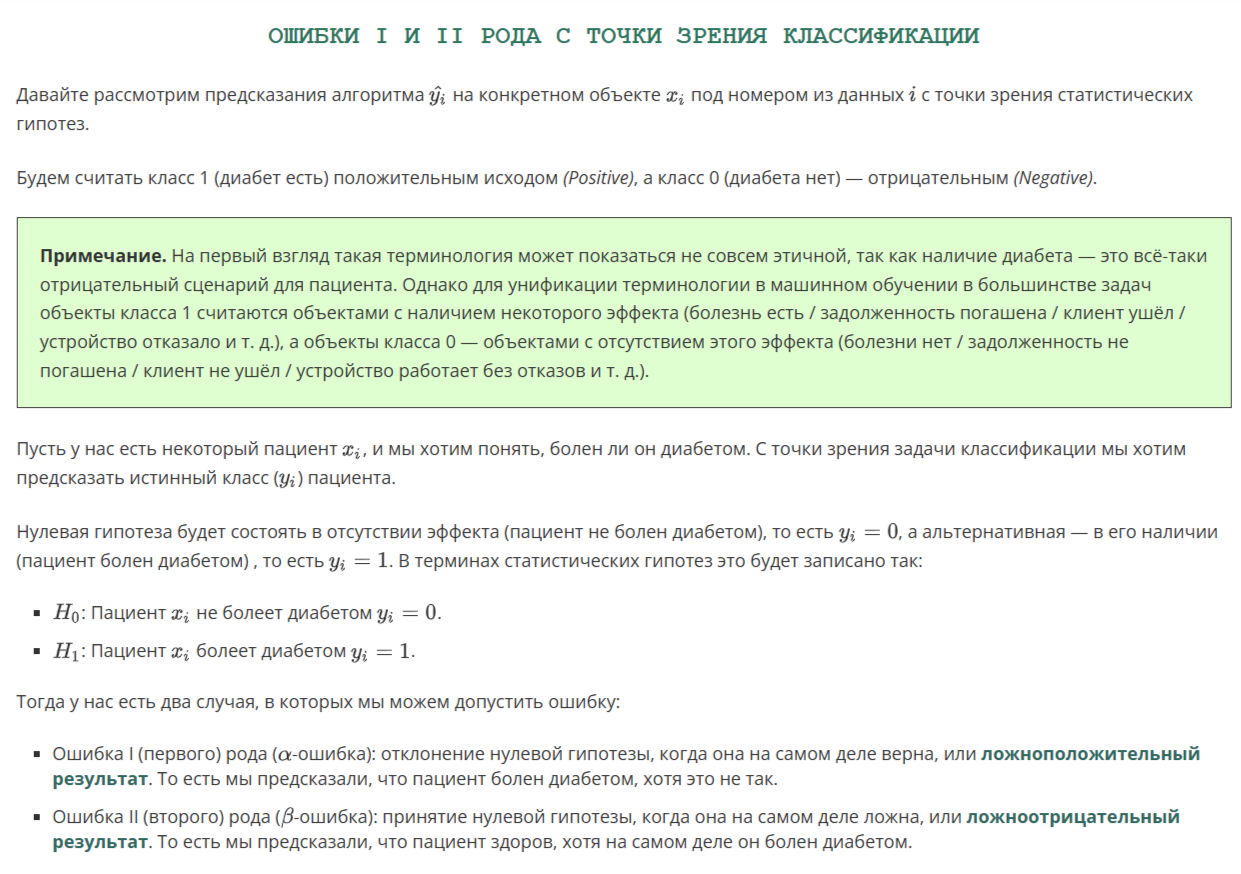

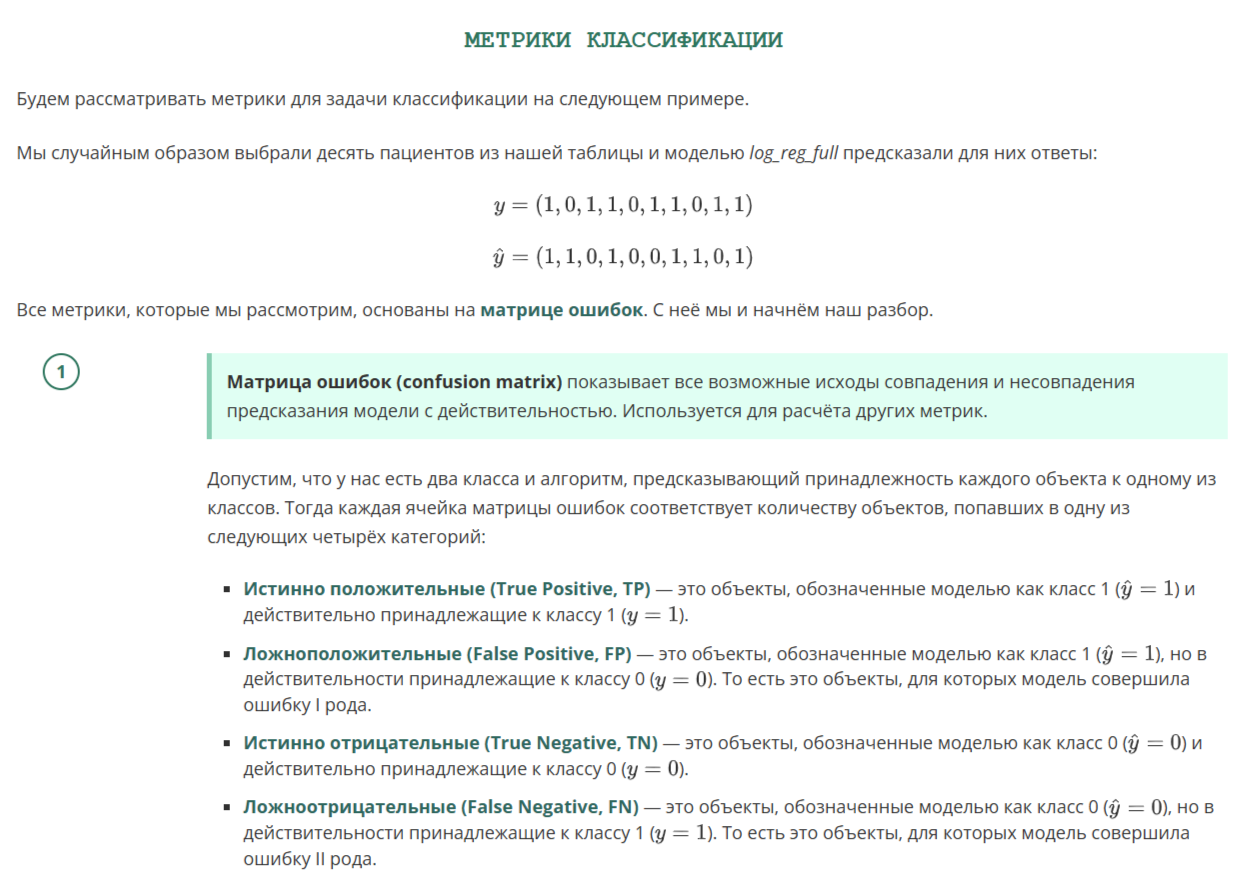

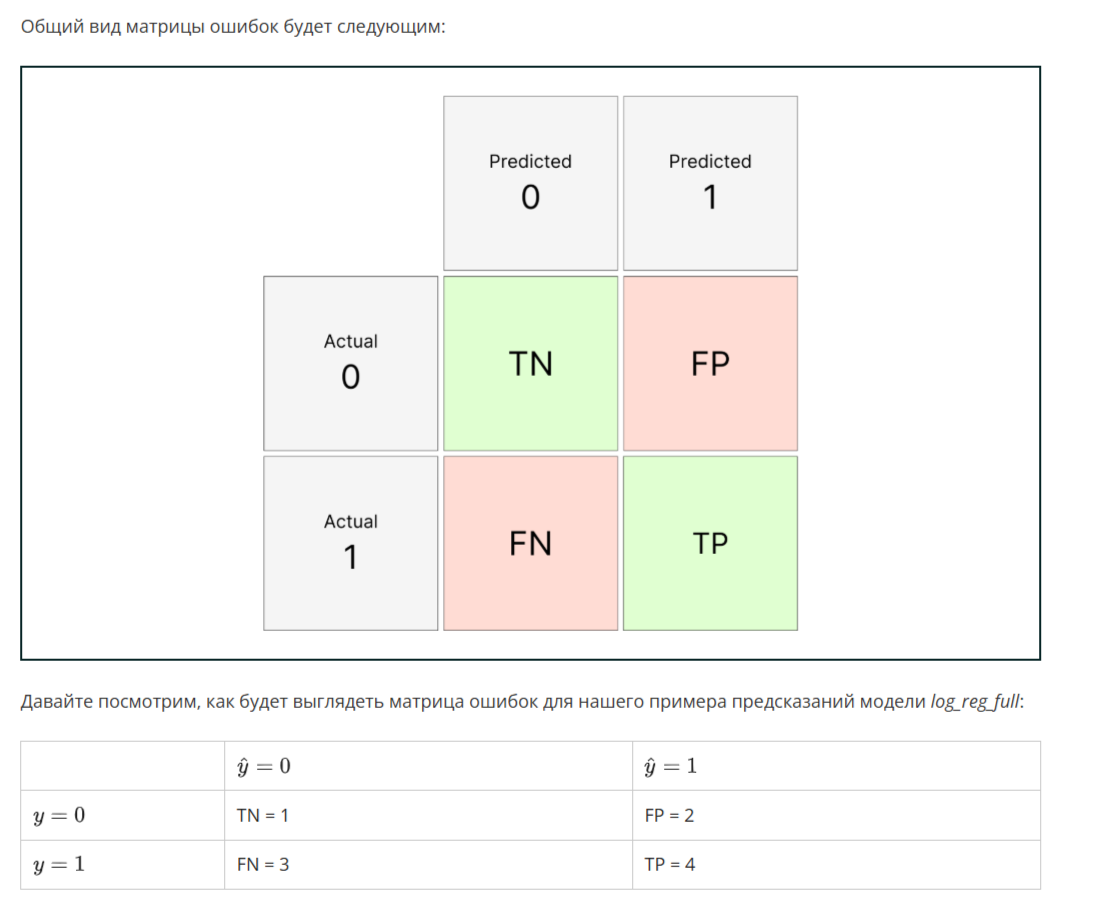

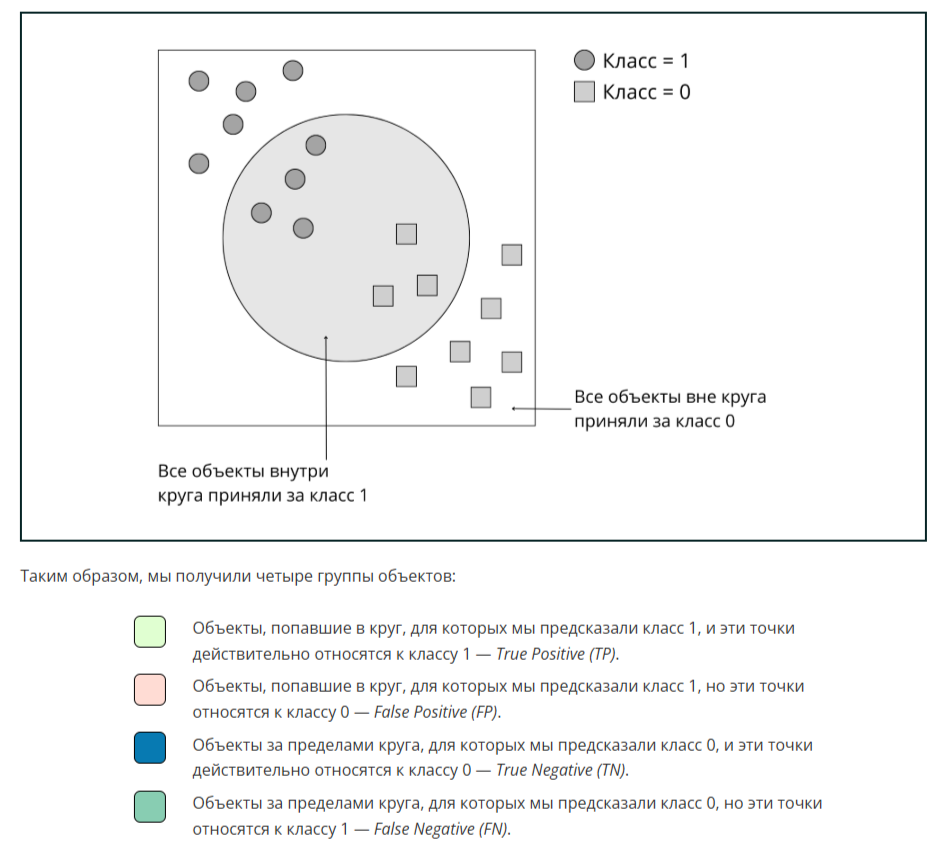

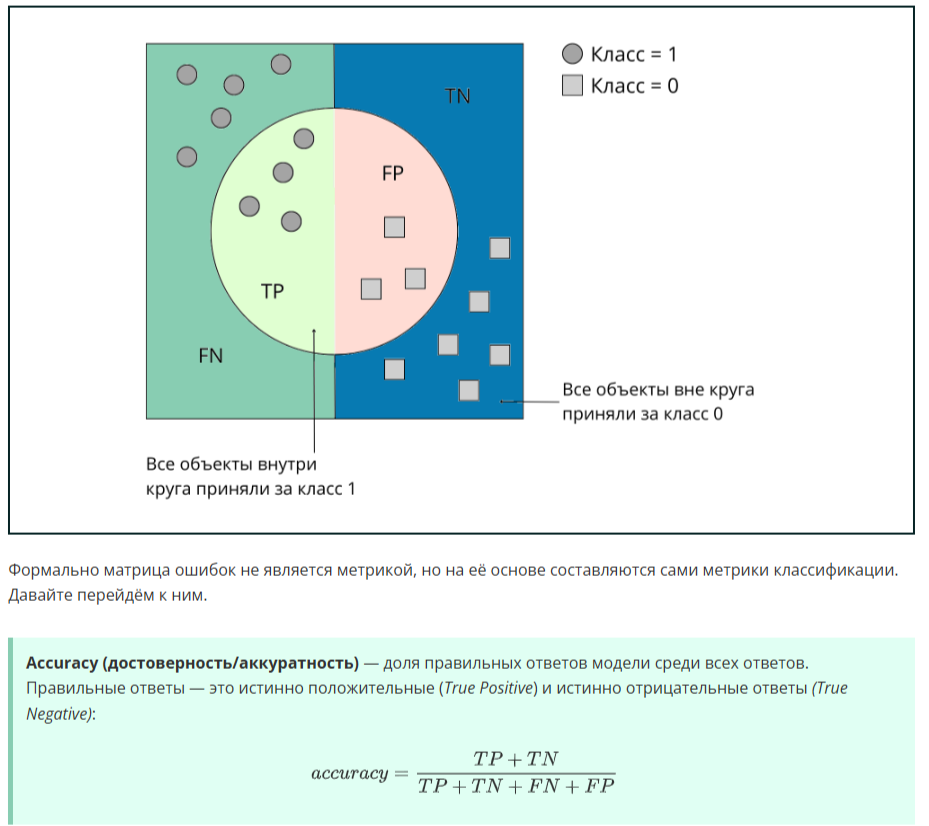

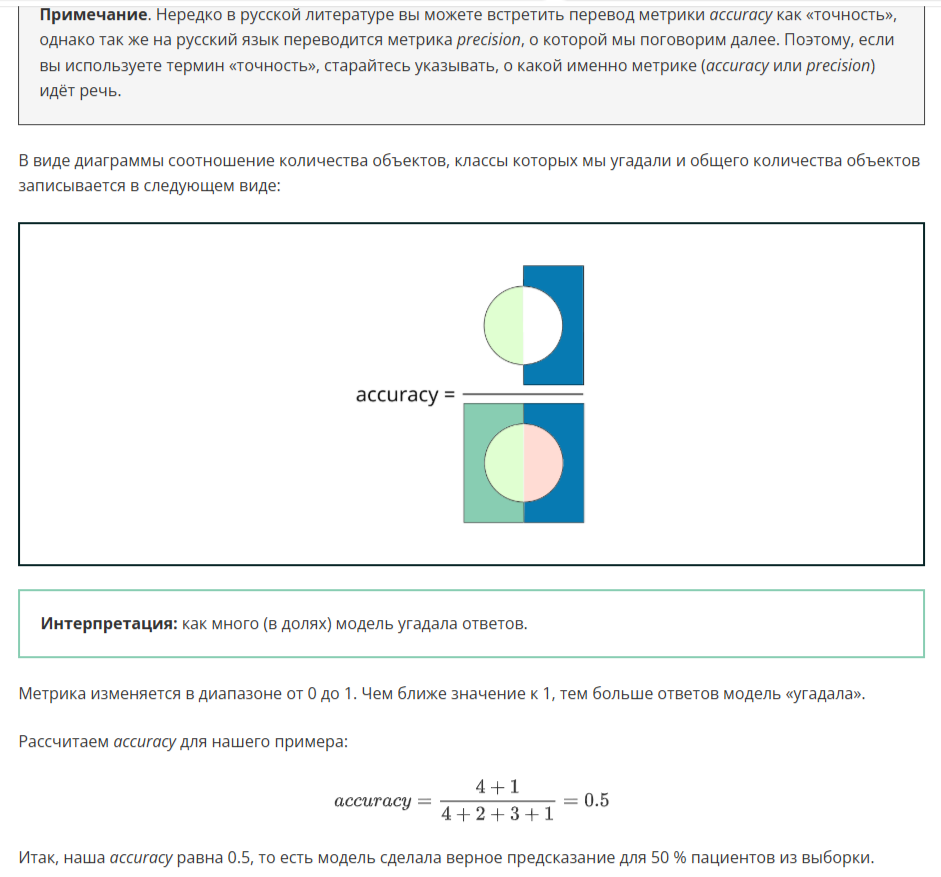

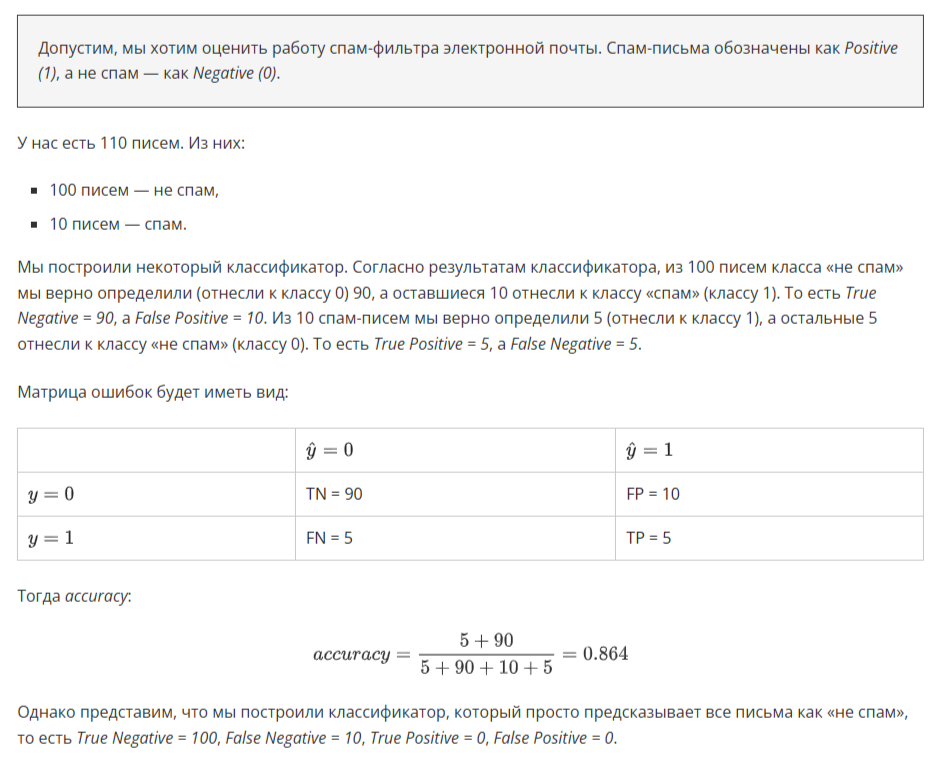

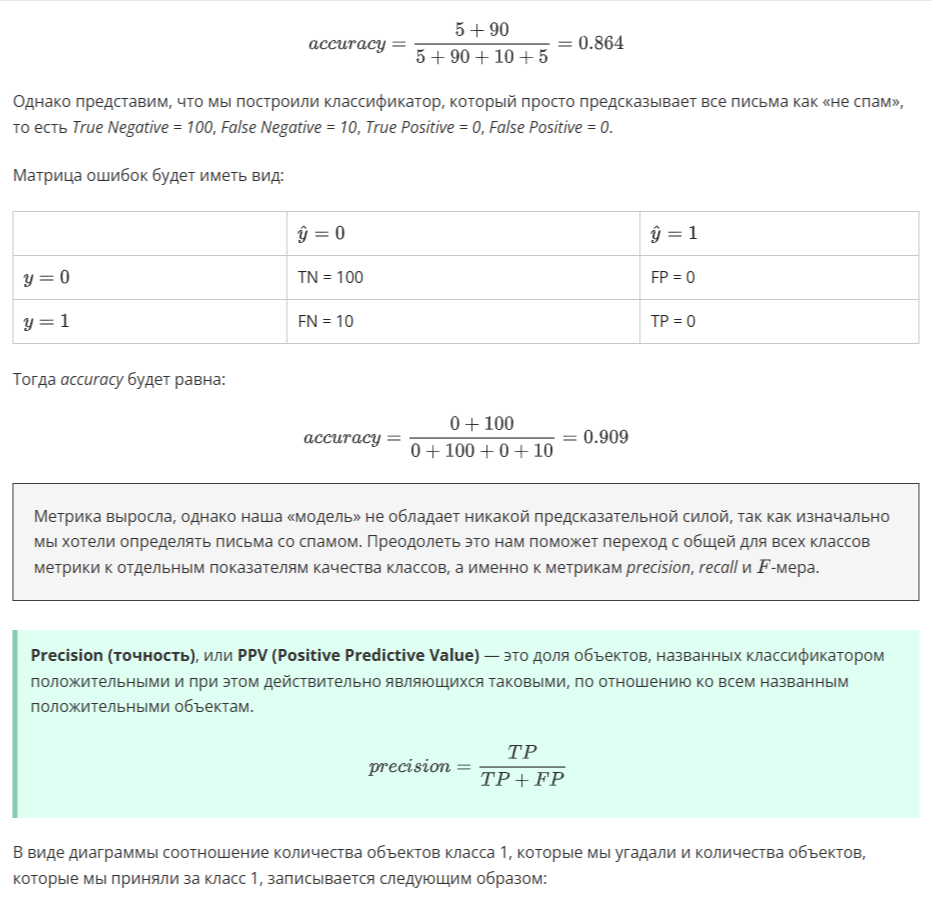

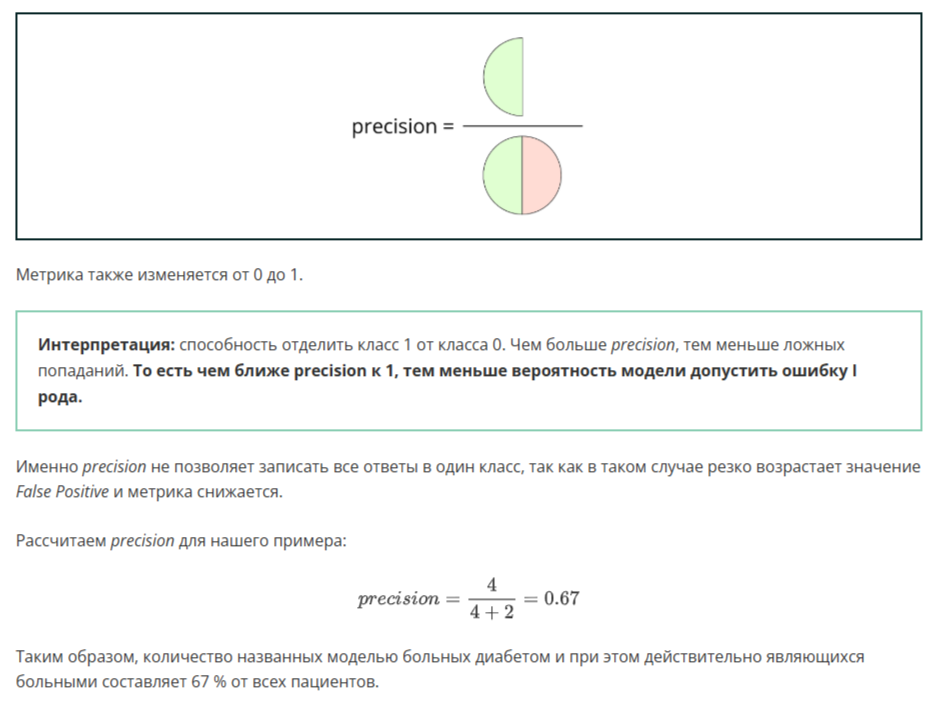

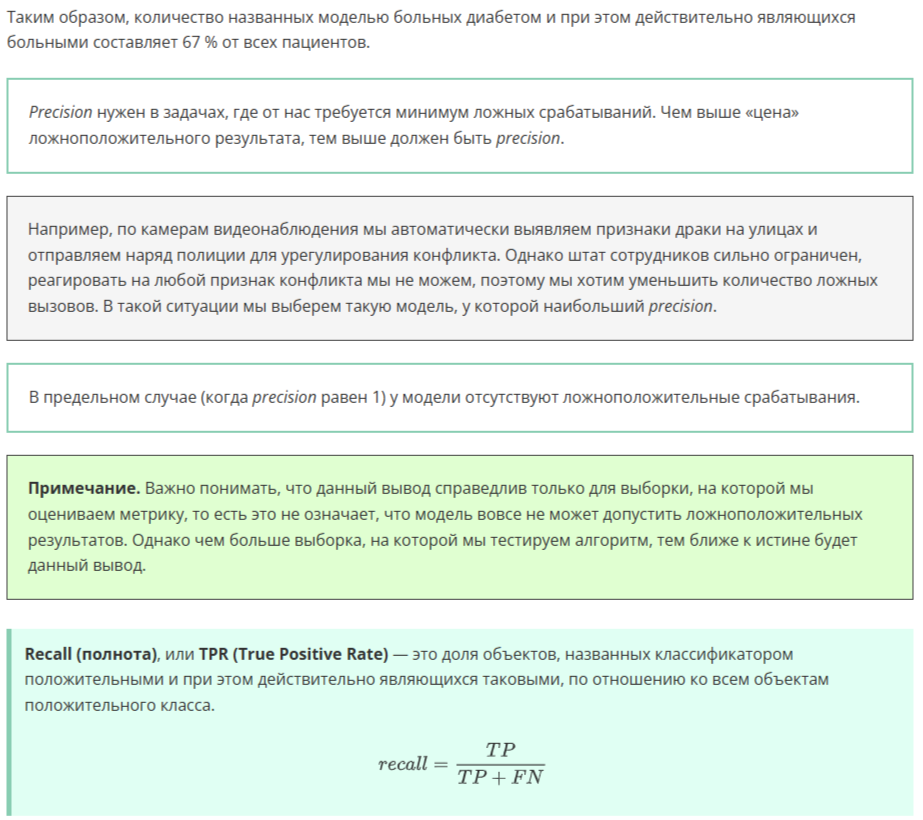

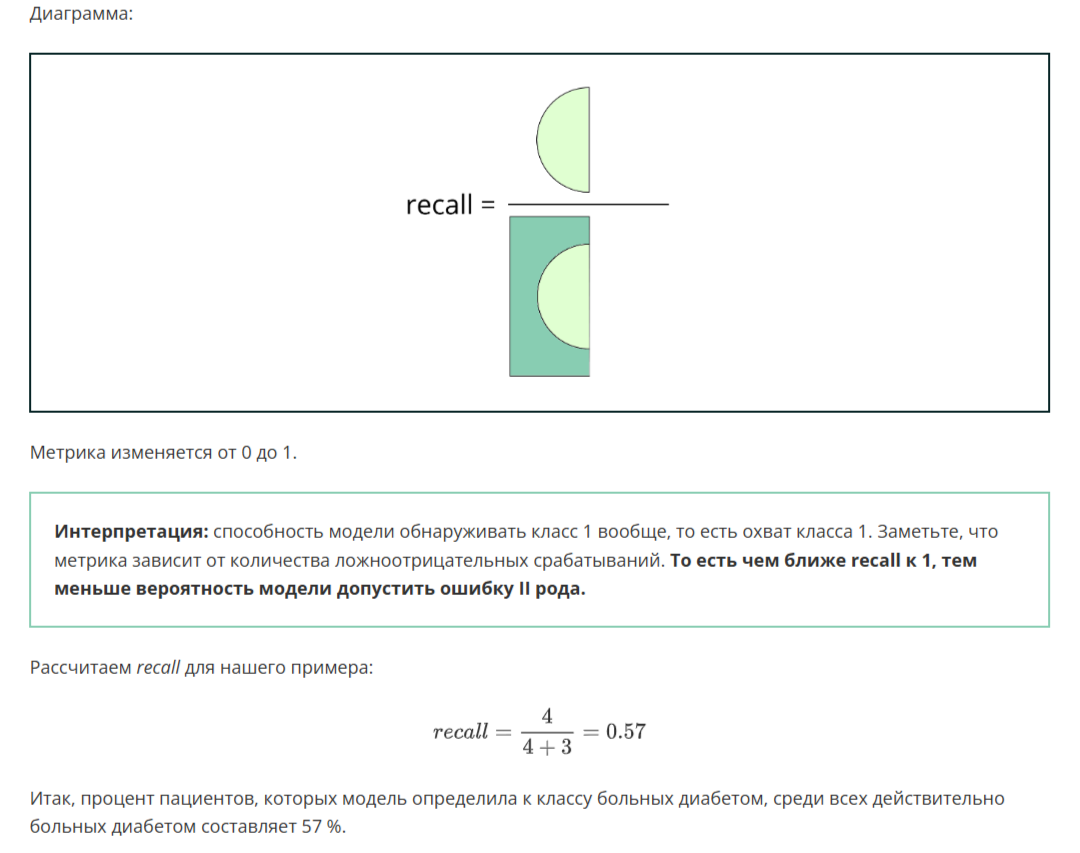

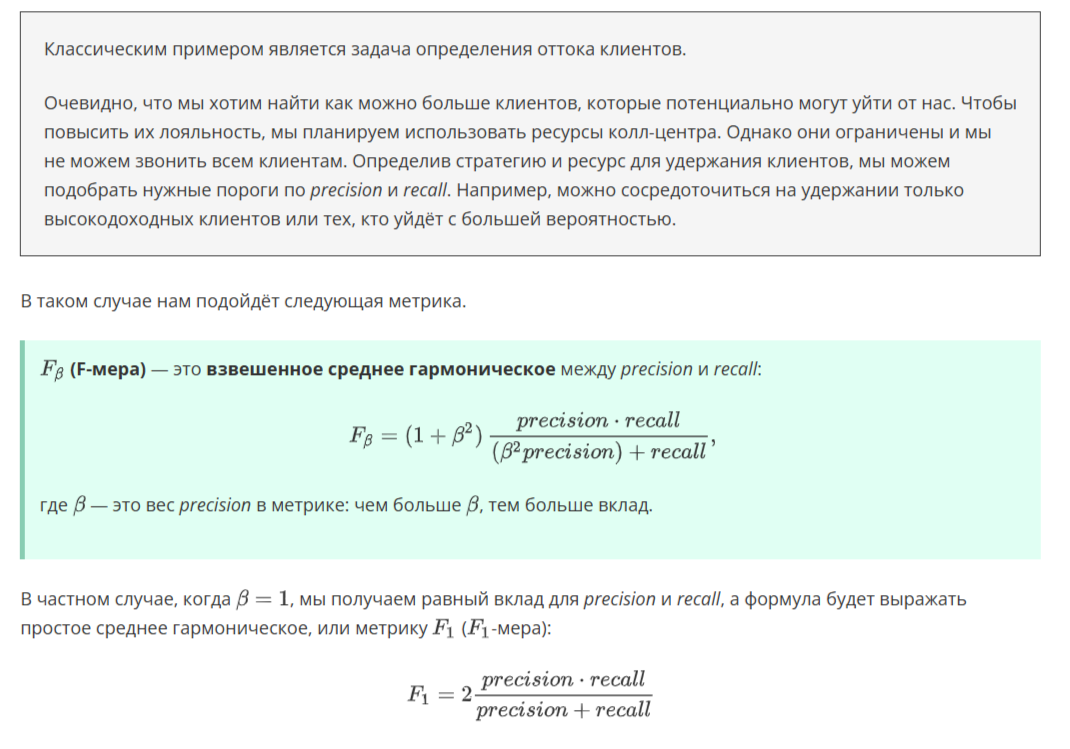

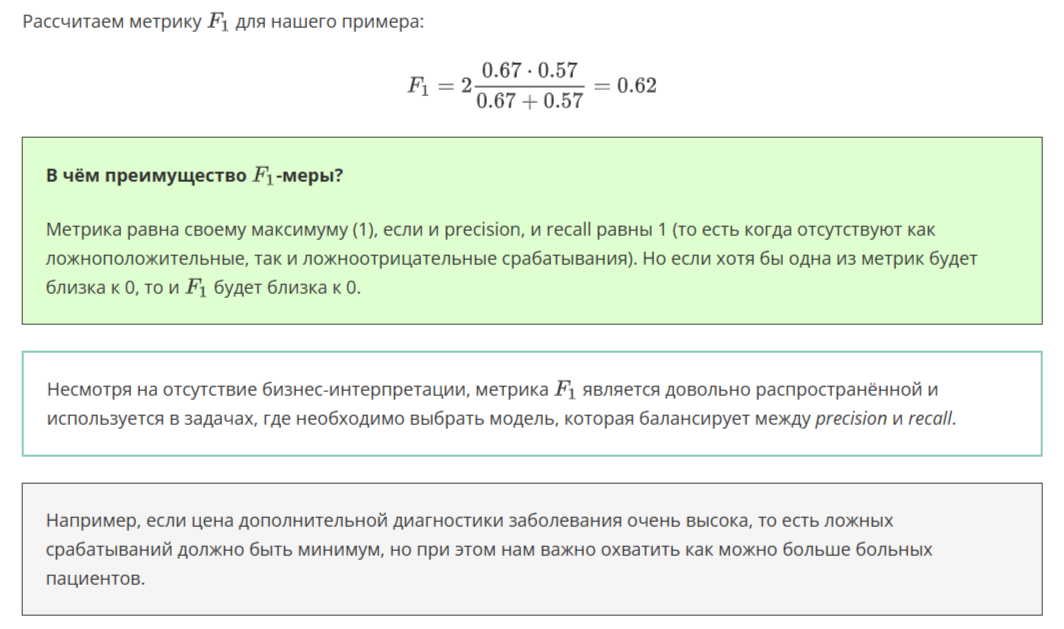

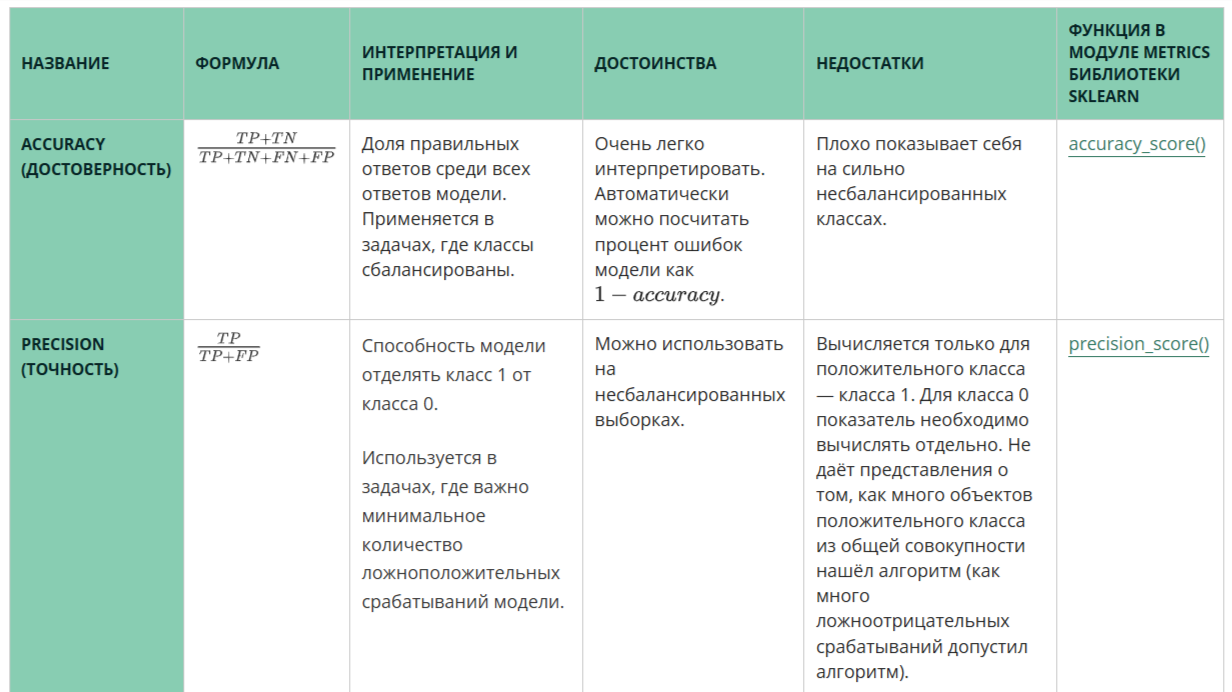

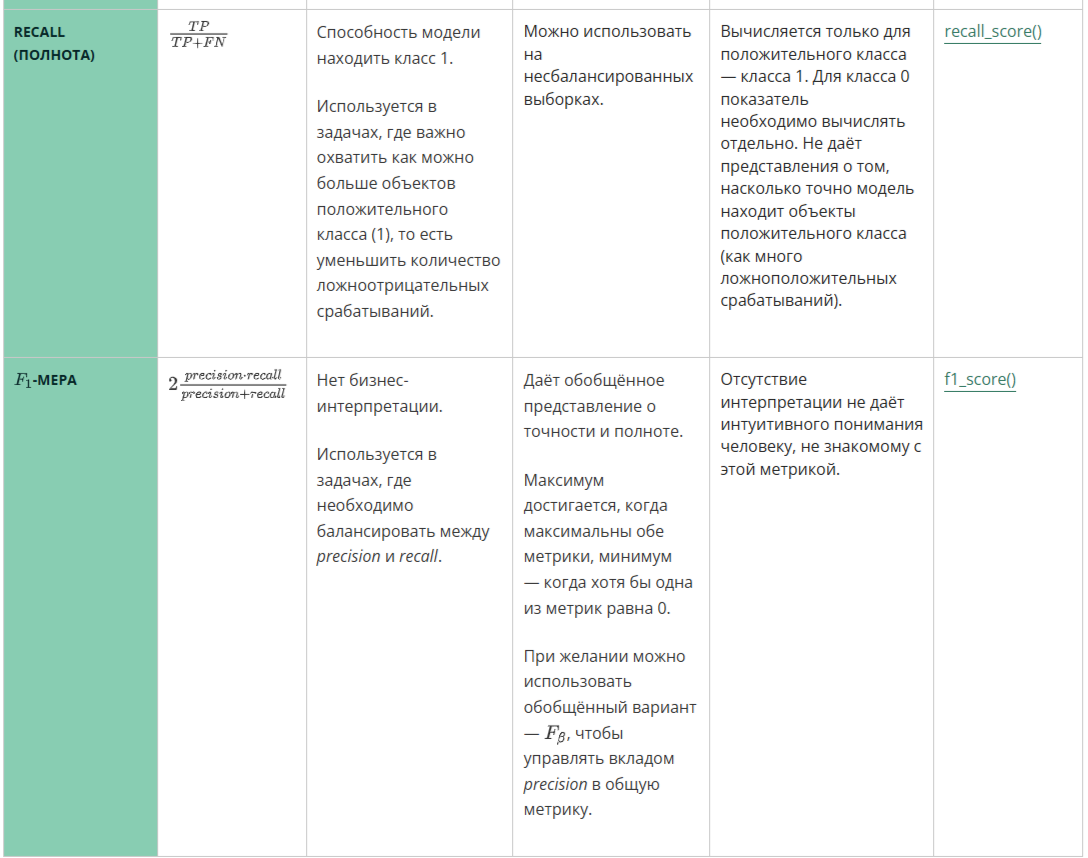

In [11]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]

In [14]:
from sklearn import linear_model
from sklearn import metrics
print(metrics.f1_score(y_true, y_pred))


0.6666666666666666


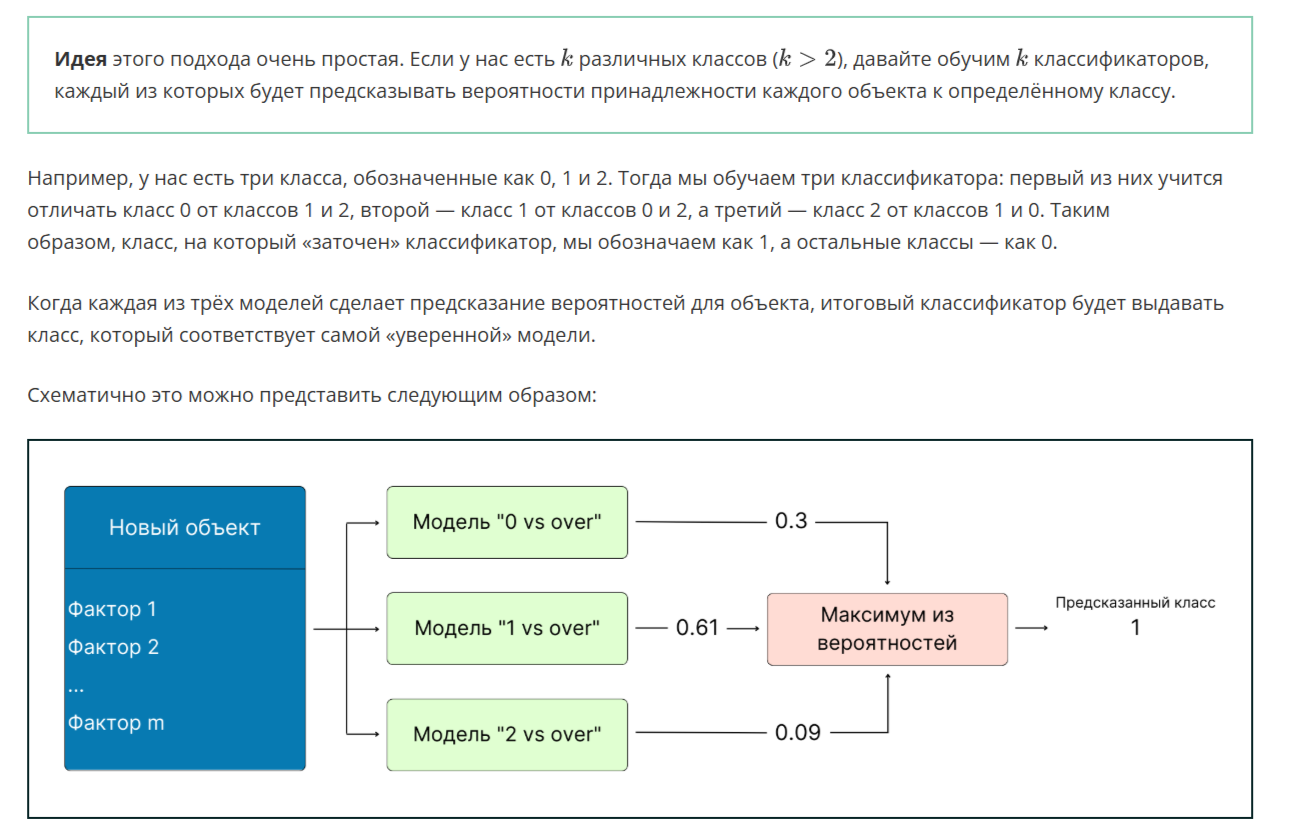

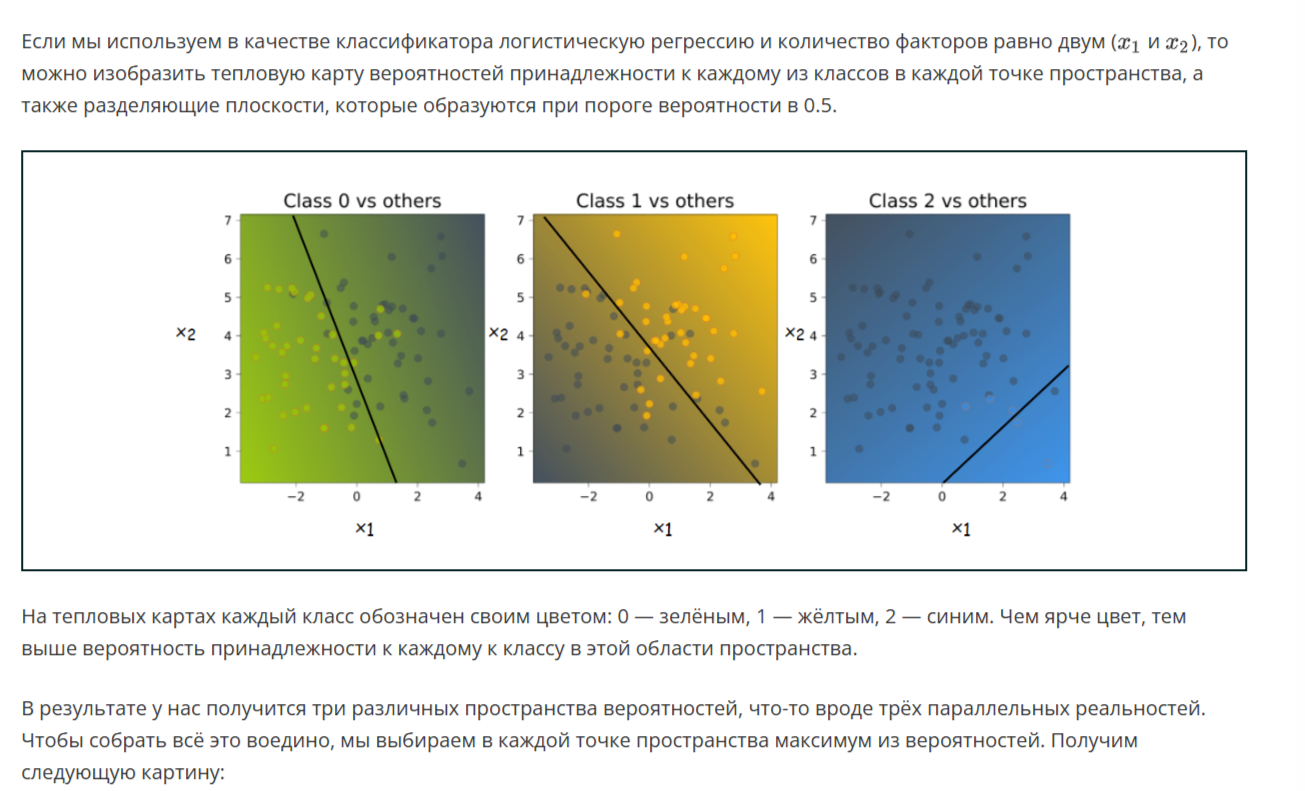

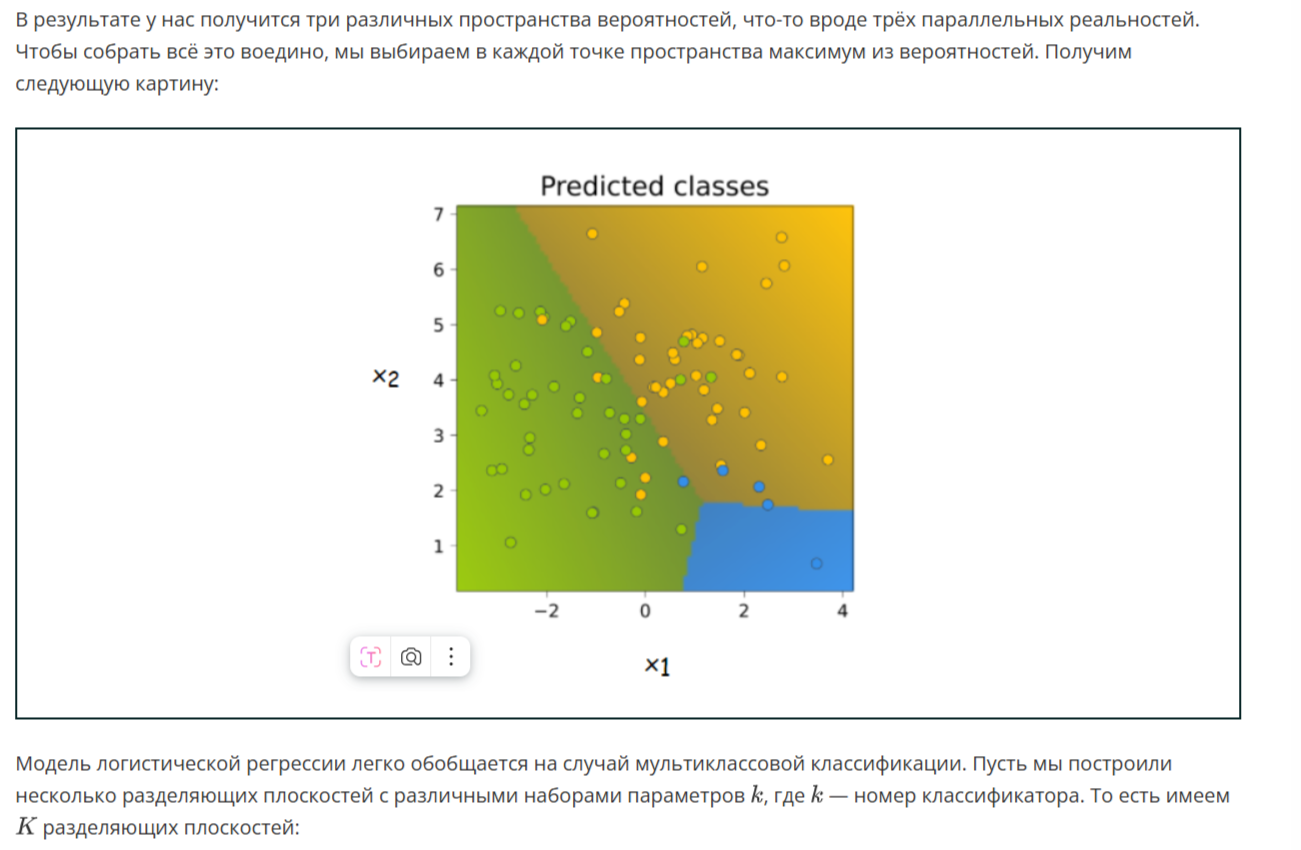